In [19]:
#Firmaların Kar Tahmini --- Regression 

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [21]:
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [22]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
df=pd.read_csv('Startups.csv')

In [25]:
#EDA

In [26]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [28]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [29]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<Axes: >

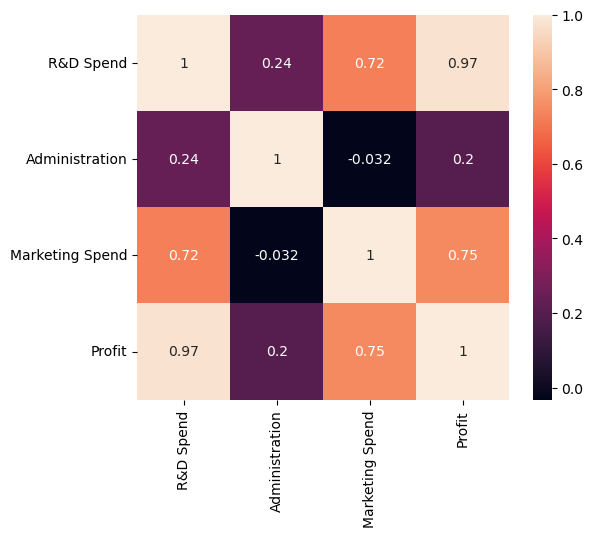

In [33]:
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(),annot=True)

In [34]:
df.shape

(50, 5)

In [36]:
abs(df.corr(numeric_only=True)['Profit'].sort_values(ascending=False))

Profit             1.000000
R&D Spend          0.972900
Marketing Spend    0.747766
Administration     0.200717
Name: Profit, dtype: float64

In [37]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [40]:
x=df[[ 'R&D Spend', 'Administration', 'Marketing Spend', 'State']]

y=df[['Profit']]

In [41]:
x=pd.get_dummies(x,drop_first=True)

In [105]:
x.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [42]:
lr=LinearRegression()

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [44]:
model=lr.fit(x_train,y_train)

In [45]:
tahmin=model.predict(x_test)

In [46]:
r2_score(tahmin,y_test)

0.885136646509236

In [47]:
(mean_squared_error(tahmin,y_test))**0.5

9055.957323458466

In [48]:
R=Ridge()
L=Lasso()

In [49]:
model2=L.fit(x_train,y_train)

In [81]:
tahmin2=model2.predict(x_test)

In [83]:
r2_score(tahmin2,y_test)

0.8851565172622659

In [84]:
(mean_squared_error(tahmin2,y_test))**0.5

9055.617160312673

In [85]:
model3=R.fit(x_train,y_train)

In [86]:
tahmin3=model3.predict(x_test)

In [87]:
r2_score(tahmin3,y_test)

0.8854004932890057

In [88]:
(mean_squared_error(tahmin3,y_test))**0.5

9049.186353499548

In [89]:
E=ElasticNet()

In [90]:
model4=E.fit(x_train,y_train)

In [91]:
tahmin4=model4.predict(x_test)

In [92]:
r2_score(tahmin4,y_test)

0.8863090378564085

In [93]:
(mean_squared_error(tahmin4,y_test))**0.5

9014.868435160368

In [94]:
Et=ExtraTreeRegressor()

In [95]:
model5=Et.fit(x_train,y_train)

In [96]:
tahmin5=model5.predict(x_test)

In [97]:
r2_score(tahmin5,y_test)

0.7915436708119555

In [98]:
(mean_squared_error(tahmin5,y_test))**0.5

18368.471663595203

In [99]:
G=GradientBoostingRegressor()

In [100]:
model6=G.fit(x_train,y_train)

In [101]:
tahmin6=model6.predict(x_test)

In [102]:
r2_score(tahmin6,y_test)

0.9243931174467893

In [103]:
(mean_squared_error(tahmin6,y_test))**0.5

8511.228039541367

In [104]:
data = pd.DataFrame(data={"Predicted Profit": tahmin6.flatten()})
print(data.head())

   Predicted Profit
0     126784.218593
1      86691.157176
2      95182.735950
3      52483.679182
4     134467.469187
